<a href="https://colab.research.google.com/github/Rajeshprd/Predict-mpg-of-the-automobile/blob/main/Predict_mpg_of_the_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the LIbraries**

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

#**loading the dataset**

In [ ]:
data = pd.read_csv("/content/auto-mpg.csv")

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.drop(['car name'], axis=1, inplace=True) 
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data.isnull().sum() # finding the null values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

### No null values 


In [ ]:
data = data[data.horsepower != '?']

In [ ]:
'?' in data

False

In [ ]:
data.shape

(392, 8)

## Correlation matrix

In [ ]:
data.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

#Plotting the heatmap of the correlation

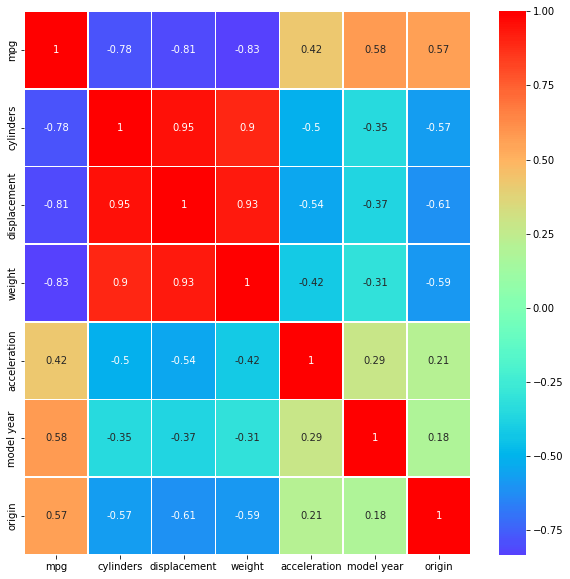

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, center=0, cmap='rainbow')
plt.show()

#Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


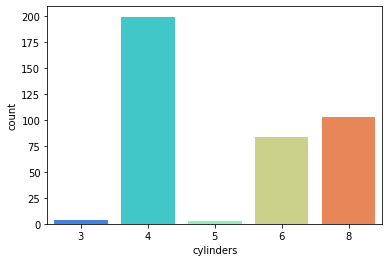

In [ ]:
sns.countplot(data.cylinders, data=data, palette='rainbow')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


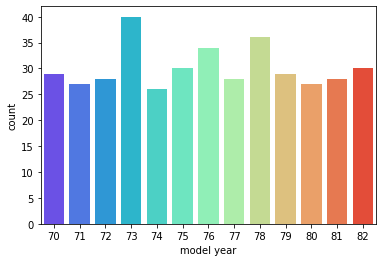

In [ ]:
sns.countplot(data['model year'], palette='rainbow')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


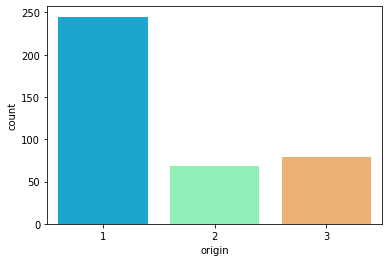

In [ ]:
sns.countplot(data.origin, palette='rainbow')
plt.show()

#Multi-variate Analysis

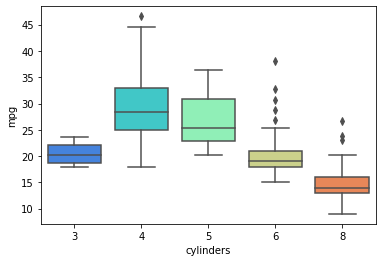

In [ ]:
sns.boxplot(y='mpg', x='cylinders', data=data, palette='rainbow')
plt.show()

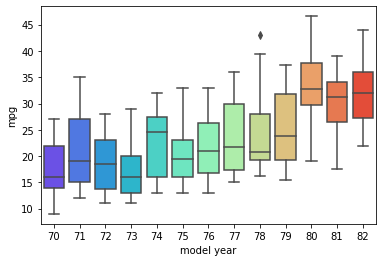

In [ ]:
sns.boxplot(y='mpg', x='model year', data=data, palette='rainbow')
plt.show()

# Modelling dataset

In [39]:
y = data.mpg
X = data.iloc[:,1:]

#Train and test data split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=123)

#Build the model

#**LinearRegression**

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
mul_reg = LinearRegression() #model creation 

In [47]:
mul_reg.fit(X = x_train, y = y_train) #model fitting

LinearRegression()

In [48]:
mul_reg.coef_
mul_reg.intercept_   #model equation

array([ 8.88178420e-15,  1.70530257e-12,  2.27373675e-13,  4.54747351e-13,
       -4.44089210e-14,  4.26325641e-14, -3.33066907e-15])

In [50]:
#model accuracy
mul_reg.score(x_test, y_test) #0.788

1.0

#**polynomial regression**

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.2, random_state=0)

lin_regression = LinearRegression()
lin_regression.fit(x_train,y_train)

print(lin_regression.score(x_test, y_test))

1.0
